## 4.9 Intro to Data Visualization with Python part 2

### This script contains the following points:

#### 1. Create data to experiment on
#### 2. Create bar chart
#### 3. Create scatterplot
#### 4. Create 70-30 random sample
#### 5. Create line graph
#### 6. Export visualizations

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
#import newest version of data
path = r'/Users/rachelallen/CareerFoundry Achievement 4/08-2022 Instacart Basket Analysis'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,flagged,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income,no_first_name
0,2539329.0,1.0,1.0,2.0,8.0,NaN,No Previous Order,196,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name
1,2398795.0,1.0,2.0,3.0,7.0,15.0,Previous Order,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name
2,473747.0,1.0,3.0,3.0,12.0,21.0,Previous Order,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name
3,2254736.0,1.0,4.0,4.0,7.0,29.0,Previous Order,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name
4,431534.0,1.0,5.0,4.0,15.0,28.0,Previous Order,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,No Missing Name


<AxesSubplot:>

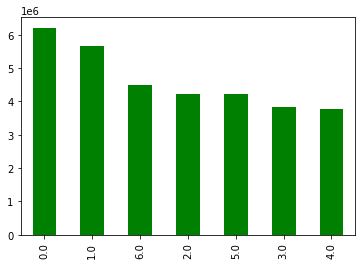

In [6]:
#2 create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart
ords_prods_all['order_day_of_week'].value_counts().plot.bar(color = 'green')

<AxesSubplot:ylabel='Frequency'>

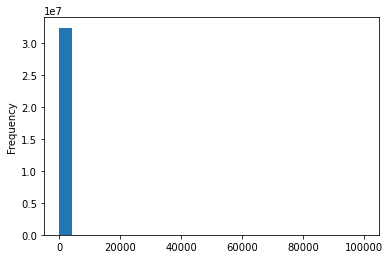

In [7]:
#histogram
ords_prods_all['prices'].plot.hist(bins = 25)

In [9]:
#remove values that are too high
ords_prods_all.loc[ords_prods_all['prices'] >100, 'prices'] = np.nan

<AxesSubplot:ylabel='Frequency'>

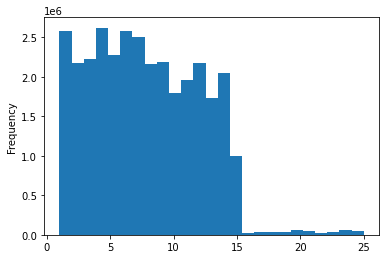

In [10]:
ords_prods_all['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

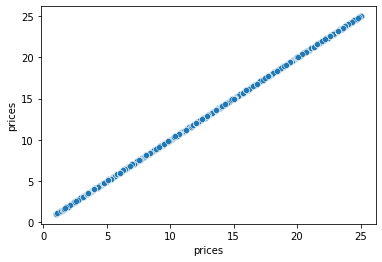

In [12]:
#create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_all)

In [13]:
#create sample data for line graph
np.random.seed(4)

In [14]:
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True, False])

In [16]:
big = ords_prods_all[dev]

In [17]:
small = ords_prods_all[~dev]

In [18]:
len(ords_prods_all)

32435070

In [20]:
#check that the length is correct
len(big) + len(small)

32435070

In [22]:
df_2 = small[['order_day_of_week','prices']]

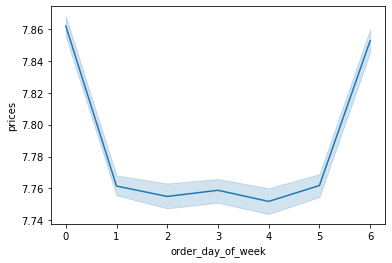

In [24]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

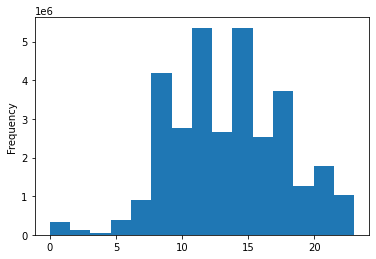

In [55]:
#3 Create a histogram of the “order_hour_of_day” column
sales_hist = ords_prods_all['order_hour'].plot.hist(bins = 15)

The histogram demonstrates that most sales happen between 8 and about 18 o'clock, with peaks and valleys in that period.

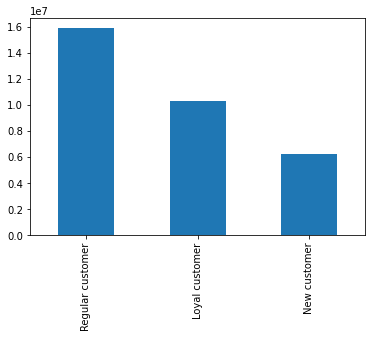

In [57]:
# 4 Create a bar chart from the “loyalty_flag” column.

loyalty_flag = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [38]:
#Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
df_3 = small[['order_hour','prices']]

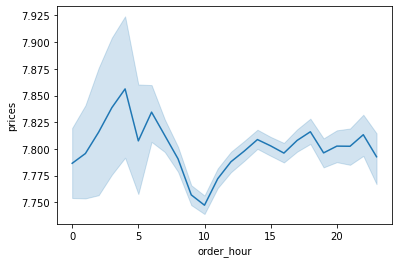

In [59]:
order_hour_line = sns.lineplot(data = df_3, x = 'order_hour',y = 'prices')

People purchase the most expensive things early in the morning and later at night. 

In [40]:
# connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
small.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'flagged', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Exists', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'mean_order', 'max_order',
       'loyalty_flag', 'mean_spending', 'spending_flag',
       'median_days_since_prior', 'frequency_flag', 'First Name', 'Last Name',
       'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'no_first_name'],
      dtype='object')

In [52]:
#I was getting an error message when I tried to create a line plot so I double checked the type of these columns
df_4['n_dependants'].dtype

dtype('float64')

In [50]:
df_4['Age'].dtype

dtype('float64')

line2 = sns.lineplot(data = df_4, x = 'n_dependants',y = 'age')

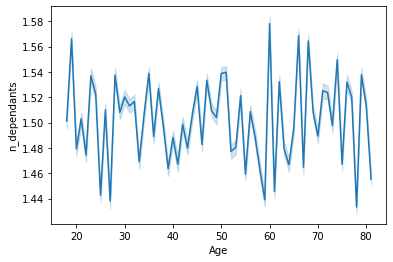

In [51]:
line2 = sns.lineplot(data = df_4, x = 'Age', y = 'n_dependants')

It doesn't look like there's any significant relationship between age and number of dependants.

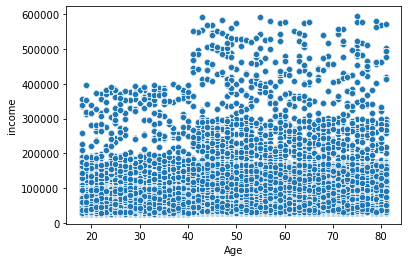

In [54]:
# You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
scatter = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_all)

It doesn't look like there's a significant relationship between age and income, except that to some extent income seems to increase at age 40. 

In [56]:
#export visualizations
sales_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_histogram.png'))

In [58]:
loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag.png'))

In [60]:
order_hour_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_line.png'))

In [61]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line.png'))

In [62]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))